In [1]:
from matplotlib import pyplot as plt
from distributed import Client

from egamma_tnp import TagNProbe
from egamma_tnp.utils import get_ratio_histograms, replace_nans

In [2]:
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
        "xtick.labelsize": 18,
        "ytick.labelsize": 18,
        "legend.numpoints": 1,
        "axes.linewidth": 2,
        "legend.title_fontsize": 16,
        "axes.labelsize": 18,
        "legend.fontsize": 16,
    }
)

In [3]:
%%time
tag_n_probe = TagNProbe(
    "/EGamma*/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD",
    goldenjson="json/Cert_Collisions2023_366442_368823_Golden.json",
    redirector="root://cmsxrootd.fnal.gov/",
    invalid=True,
)
# tag_n_probe = TagNProbe(
#     "root_files/Egamma0.root",
#     "root_files/Egamma1.root",
#     local=True,
#     goldenjson="json/Cert_Collisions2023_366442_368823_Golden.json",
# )

Dataset /EGamma0/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD has 22 files

First file of dataset /EGamma0/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD is root://cmsxrootd.fnal.gov//store/data/Run2023C/EGamma0/NANOAOD/PromptNanoAODv12_v3-v1/80000/eaf1e0d7-82fd-47bb-a209-bd8fcc135377.root

Last file of dataset /EGamma0/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD is root://cmsxrootd.fnal.gov//store/data/Run2023C/EGamma0/NANOAOD/PromptNanoAODv12_v3-v1/80000/791fb6e9-1b50-4e93-9629-f7ccd22b032f.root

Dataset /EGamma1/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD has 24 files

First file of dataset /EGamma1/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD is root://cmsxrootd.fnal.gov//store/data/Run2023C/EGamma1/NANOAOD/PromptNanoAODv12_v3-v1/80000/91de45bd-da03-4bb8-a7ec-9de4f6486a71.root

Last file of dataset /EGamma1/Run2023C-PromptNanoAODv12_v3-v1/NANOAOD is root://cmsxrootd.fnal.gov//store/data/Run2023C/EGamma1/NANOAOD/PromptNanoAODv12_v3-v1/80000/43796495-d9b4-4683-8e3d-3b2b44b3c796.root

CPU times: user 3.66 s, 

In [4]:
%%time

with Client() as client:
    (
        hpt_all,
        hpt_pass,
        heta_all,
        heta_pass,
        habseta_all,
        habseta_pass,
    ) = tag_n_probe.get_tnp_histograms(compute=True, scheduler=None, progress=True)

hptratio, hetaratio, habsetaratio = get_ratio_histograms(
    hpt_all, hpt_pass, heta_all, heta_pass, habseta_all, habseta_pass
)

print(f"Passing probes: {hpt_pass.sum(flow=True)}")
print(f"All probes: {hpt_all.sum(flow=True)}")

[########################################] | 100% Completed | 539.14 ms
Passing probes: 634217.0
All probes: 743324.0
CPU times: user 44.5 s, sys: 4.82 s, total: 49.3 s
Wall time: 3min 13s


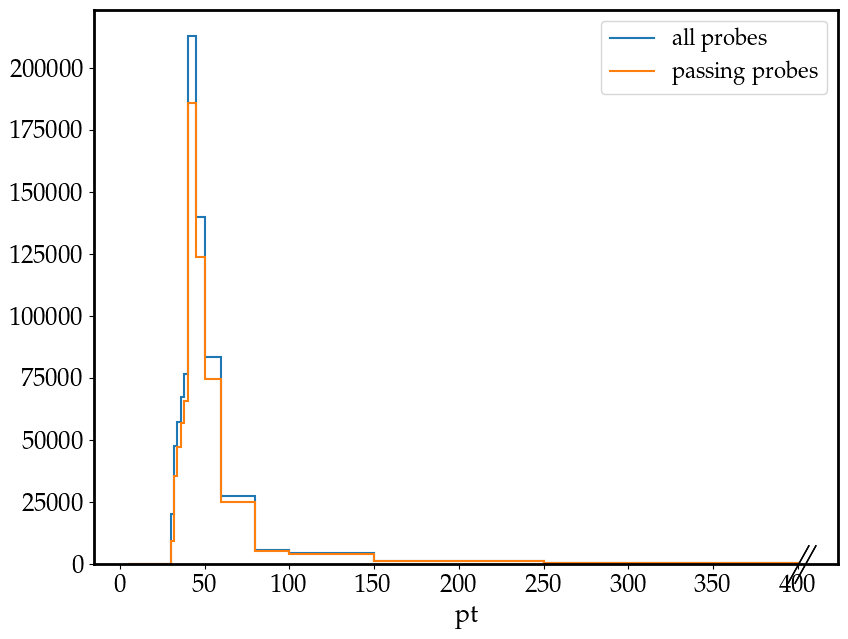

In [5]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hpt_all.plot1d(label="all probes")
hpt_pass.plot1d(label="passing probes")
plt.legend()
plt.savefig("plots/pt.pdf", bbox_inches="tight")
plt.show()

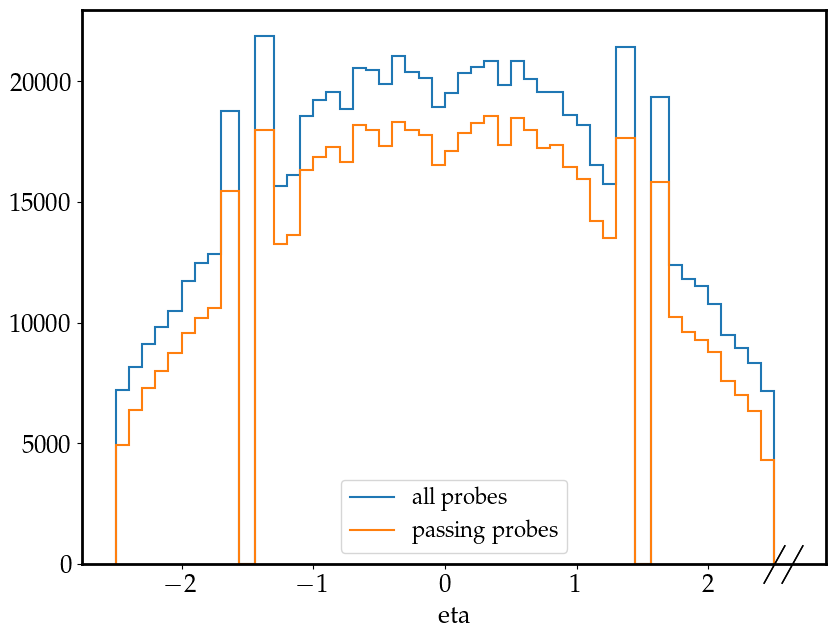

In [6]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
heta_all.plot1d(label="all probes")
heta_pass.plot1d(label="passing probes")
plt.legend()
plt.savefig("plots/eta.pdf", bbox_inches="tight")
plt.show()

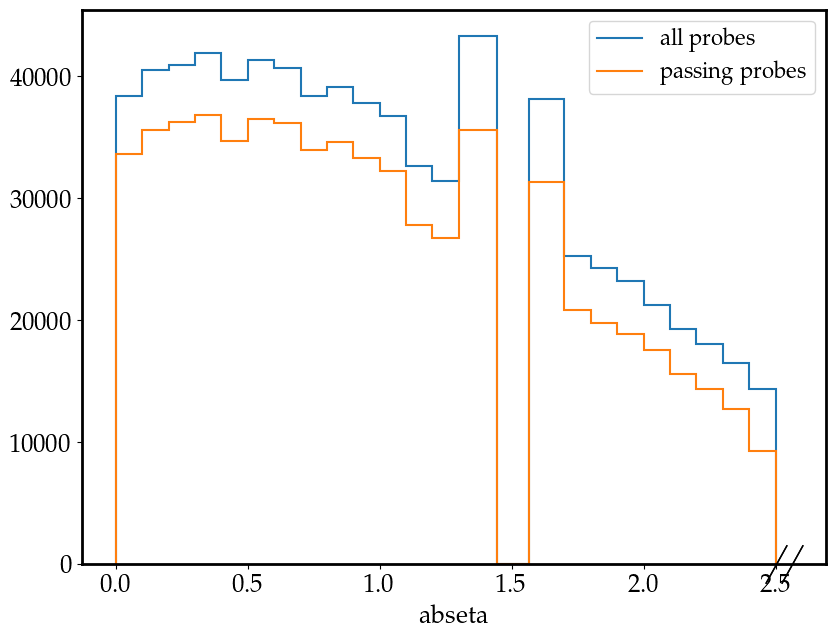

In [7]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
habseta_all.plot1d(label="all probes")
habseta_pass.plot1d(label="passing probes")
plt.legend()
plt.savefig("plots/abseta.pdf", bbox_inches="tight")
plt.show()

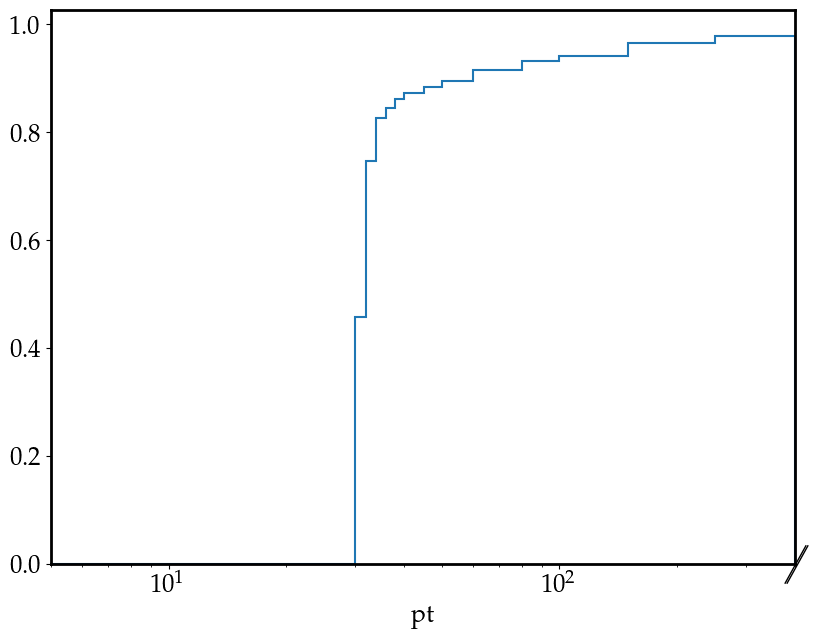

In [8]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hptratio.plot1d()
plt.xlim(5, 400)
plt.xscale("log")
plt.savefig("plots/eff_pt.pdf", bbox_inches="tight")
plt.show()

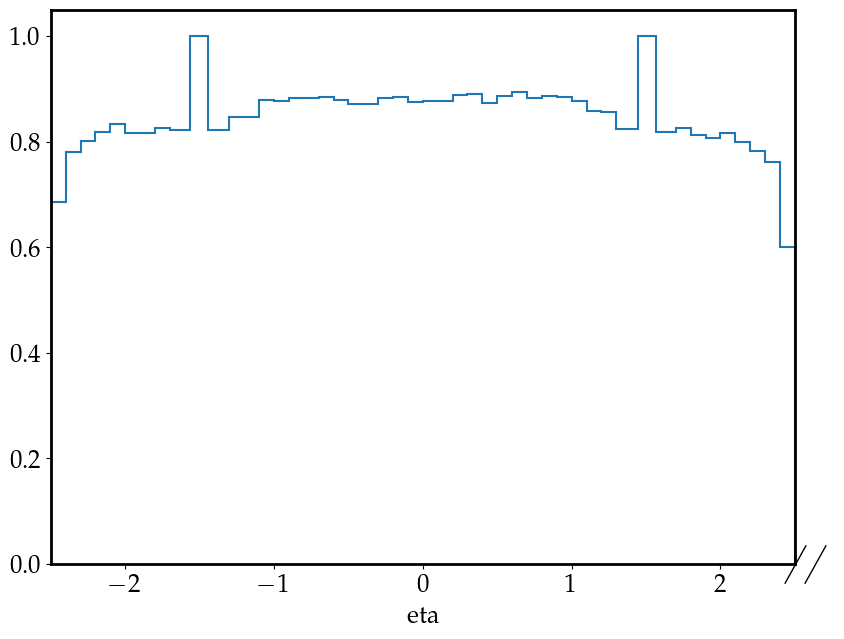

In [9]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
hetaratio.plot1d()
plt.xlim(-2.5, 2.5)
plt.savefig("plots/eff_eta.pdf", bbox_inches="tight")
plt.show()

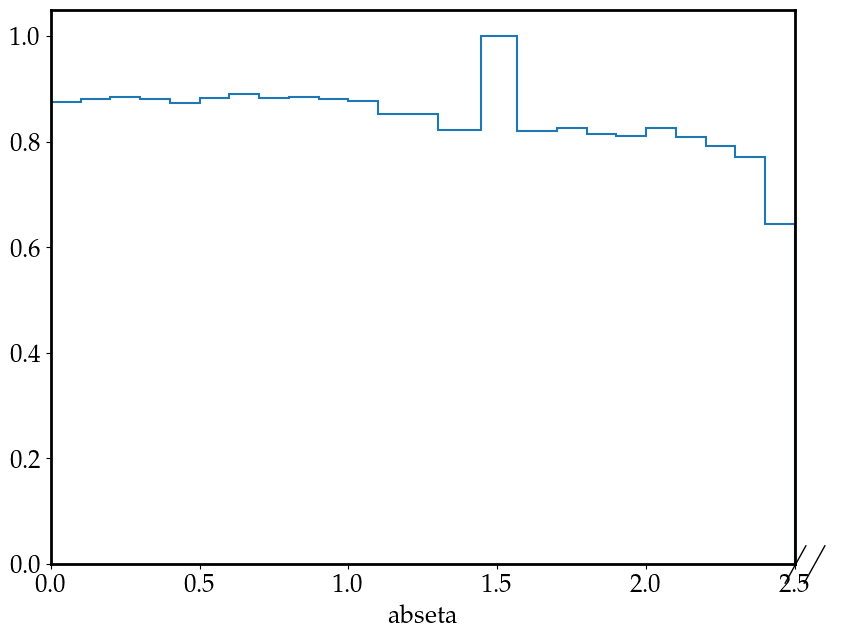

In [10]:
plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
habsetaratio.plot1d()
plt.xlim(0, 2.5)
plt.savefig("plots/eff_abseta.pdf", bbox_inches="tight")
plt.show()